# INF391 - Tarea 6

1.   Ejecute **Spectral Clustering** en cada uno de los siguientes conjuntos de datos y comente en cuál de ellos es capaz de encontrar la agrupación correcta ("natural"). 

2.   Detalle una situación en la cuál sería conveniente utilizar K-Means en lugar de Spectral Clustering.

In [12]:
from numpy import genfromtxt
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding

In [5]:
d1 = genfromtxt('moons.csv', delimiter=',')
d2 = genfromtxt('rings.csv', delimiter=',')
d3 = genfromtxt('spiral.csv', delimiter=',')

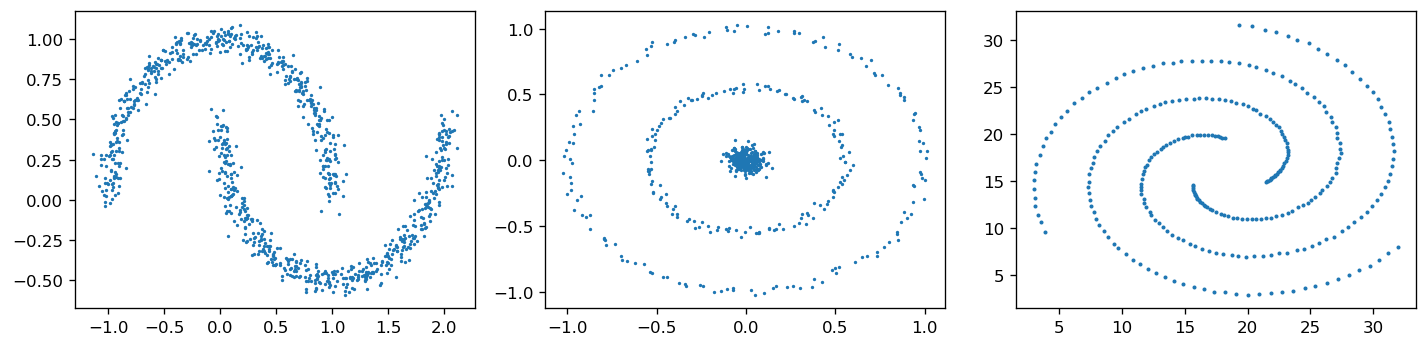

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3), dpi=120)
ax1.scatter(d1[:,0], d1[:,1], s=1)  
ax2.scatter(d2[:,0], d2[:,1], s=1) 
ax3.scatter(d3[:,0], d3[:,1], s=2) 
plt.tight_layout()
plt.show()

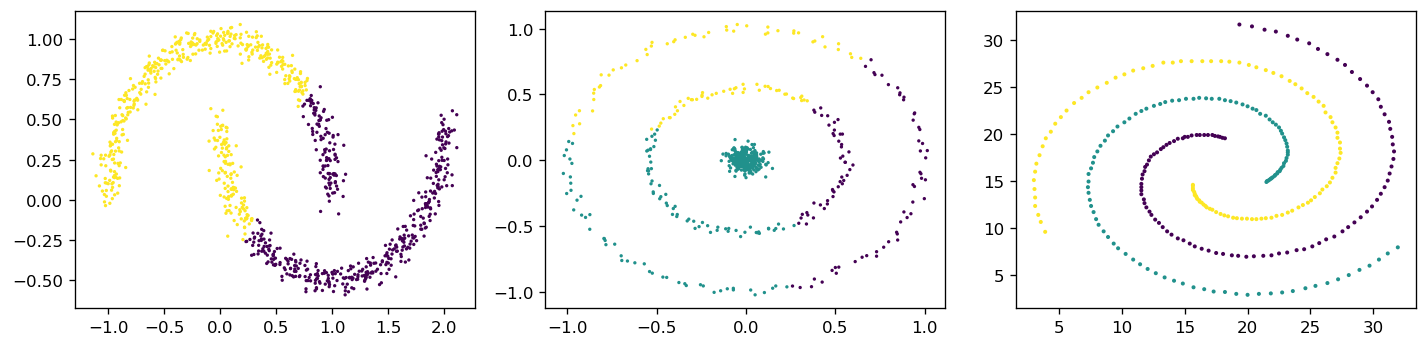

In [9]:
c_1 = SpectralClustering(n_clusters = 2).fit_predict(d1)
c_2 = SpectralClustering(n_clusters = 3).fit_predict(d2)
c_3 = SpectralClustering(n_clusters = 3).fit_predict(d3)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3), dpi=120)
ax1.scatter(d1[:,0], d1[:,1], c = c_1,s=1)  
ax2.scatter(d2[:,0], d2[:,1], c = c_2,s=1) 
ax3.scatter(d3[:,0], d3[:,1], c = c_3,s=2) 
plt.tight_layout()
plt.show()

1) Cabe notar que utilizando Spectral Clustering, generando la matriz de afinidad con un Kernel Gaussiano, solo en la tercera imagen fue posible detectar la agrupación "natural", mientras que en los otros dos casos no.

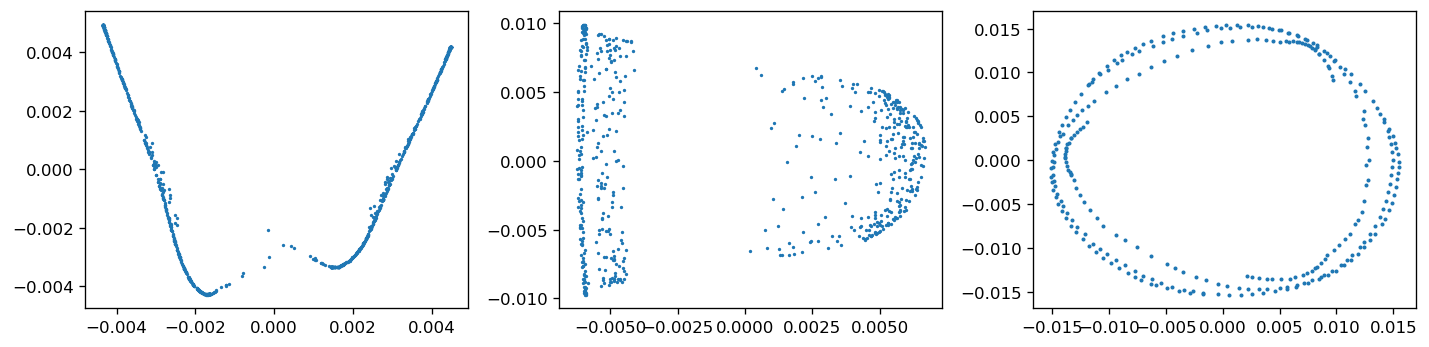

In [20]:
embedding = SpectralEmbedding(n_components=2)
d1_transformed = embedding.fit_transform(d1)
d2_transformed = embedding.fit_transform(d2)
d3_transformed = embedding.fit_transform(d3)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3), dpi=120)
ax1.scatter(d1_transformed[:,0], d1_transformed[:,1],s=1)  
ax2.scatter(d2_transformed[:,0], d2_transformed[:,1],s=1) 
ax3.scatter(d3_transformed[:,0], d3_transformed[:,1],s=2) 
plt.tight_layout()
plt.show()

Al pasar las agrupaciones a un espacio de 2 dimensiones, es posible notar que se forman definidas bien definidas, sin embargo, en la tercera imagen no es muy facil apreciar las agrupaciones, sin embargo, al ejecutar Spectral Clustering, solo en esta detecta la agrupación natural.

2) Si los datos se encuentran en bajas dimensiones es mas conveniente aplicar K-means, ya que no requiere aplicar algún tipo de transformación a los datos, ahora, si los datos se encuentran en alguna dimensión superior es mejor aplicar Spectral Clustering, si no, se pueden generar agrupaciones extrañas y que no corresponden. 